In [1]:
import Ngl, Nio
import os, numpy
from IPython.display import Image

outfilename = "newcolor1"

#os.system('rm '+outfilename+'.png')

dirc = Ngl.pynglpath("data")
f    = Nio.open_file(os.path.join(dirc,"cdf","uv300.nc"))
u    = f.variables["U"][1,:,:]
lat  = f.variables["lat"][:]
lon  = f.variables["lon"][:]
 
wks_type = "png"
wks = Ngl.open_wks(wks_type, outfilename)

cnres                 = Ngl.Resources()

# Contour resources
cnres.cnFillOn        = True
cnres.cnFillPalette   = "BlueYellowRed"      # New in PyNGL 1.5.0
cnres.cnLinesOn       = False
cnres.cnLineLabelsOn  = False
cnres.cnFillMode             = "RasterFill"

# Labelbar resource
cnres.lbOrientation   = "horizontal"
cnres.lbBoxEndCapStyle= "TriangleBothEnds"

# Scalar field resources
cnres.sfXArray        = lon
cnres.sfYArray        = lat

# Map resources
cnres.mpFillOn               = True
#cnres.mpPerimOn = False
#cnres.mpFillOn               = False
cnres.mpFillDrawOrder        = "PostDraw"
cnres.mpLandFillColor        = "Gray"
cnres.mpOceanFillColor       = "Transparent"
cnres.mpInlandWaterFillColor = "Transparent"
cnres.mpGridAndLimbOn      =  False                  #-- don't draw grid lines
cnres.mpProjection = "Robinson"
cnres.mpCenterLonF = 0.

# Remove box around plot
cnres.pmTickMarkDisplayMode = "Never"

# Remove Lon/lat ticks
cnres.tmXBOn = False
cnres.tmYLOn = False
cnres.tmXTOn = False
cnres.tmYROn = False

# Titles
cnres.tiMainString = 'Test'
#cnres.tiMainFont        = "Helvetica-bold"
#cnres.tiMainOffsetYF    = 0.025
#cnres.tiMainFontHeightF = 0.015

def subtitles(wks, plot, left_string, center_string, right_string, tres):
    ttres         = tres     # Copy resources
    ttres.nglDraw = False    # Make sure string is just created, not drawn.

    #
    # Retrieve font height of left axis string and use this to calculate
    # size of subtitles.
    #
    if not hasattr(ttres,"txFontHeightF"):
        font_height = Ngl.get_float(plot.base,"tiXAxisFontHeightF")
        ttres.txFontHeightF = font_height*0.8    # Slightly smaller

    #
    # Set some some annotation resources to describe how close text  
    # is to be attached to plot.
    #
    amres = Ngl.Resources()
    if not hasattr(ttres,"amOrthogonalPosF"):
        amres.amOrthogonalPosF = -0.51   # Top of plot plus a little extra
                                     # to stay off the border.
    else:
        amres.amOrthogonalPosF = ttres.amOrthogonalPosF

    #
    # Create three strings to put at the top, using a slightly
    # smaller font height than the axis titles.
    #
    if left_string != "":
        txidl = Ngl.text(wks, plot, left_string, 0., 0., ttres)

        amres.amJust         = "BottomLeft"
        amres.amParallelPosF = -0.5   # Left-justified
        annoidl              = Ngl.add_annotation(plot, txidl, amres)

    if center_string != "":
        txidc = Ngl.text(wks, plot, center_string, 0., 0., ttres)

        amres.amJust         = "BottomCenter"
        amres.amParallelPosF = 0.0   # Centered
        annoidc              = Ngl.add_annotation(plot, txidc, amres)

    if right_string != "":
        txidr = Ngl.text(wks, plot, right_string, 0., 0., ttres)

        amres.amJust         = "BottomRight"
        amres.amParallelPosF = 0.5   # Right-justifed
        annoidr              = Ngl.add_annotation(plot, txidr, amres)

    return


contour = Ngl.contour_map(wks,u,cnres)

subtitles(wks,contour,"Left string","Center string","Right string",cnres)




#res2 = Ngl.Resources()                            #; res2 probability plots

#res2.gsnDraw             = False       #; Do not draw plot
#res2.gsnFrame            = False       #; Do not advance frome

#res2.cnLevelSelectionMode = "ManualLevels" #; set manual contour levels
#res2.cnMinLevelValF      = 0.00        #; set min contour level
#res2.cnMaxLevelValF      = 1.05        #; set max contour level
#res2.cnLevelSpacingF     = 0.05        #; set contour spacing

#res2.cnInfoLabelOn       = False       #; turn off info label

#res2.cnLinesOn           = False       #; do not draw contour lines
#res2.cnLineLabelsOn      = False       #; do not draw contour labels

#res2.cnFillScaleF        = 0.6       #  ; add extra density
#delete(prob.long_name)

#plot2   = Ngl.gsn_csm_contour(wks,gsn_add_cyclic_point(prob(:,:,0)), res2)
#plot2   = Ngl.gsn_csm_contour(wks,gsn_add_cyclic_point(u, res2))
#opt     = True
#opt.gsnShadeFillType = "pattern"
#opt.gsnShadeLow = 17 
#plot2   = gsn_contour_shade(plot2, 32, 30, opt) #; shade all areas less than the
#                                         ; 0.05 contour level

#cnres2                   = Ngl.Resources()
cnres2                   = cnres
cnres2.cnFillOn          = True   # Turn on contour level fill.
cnres2.cnMonoFillPattern = False  # Indicate you want multiple fill patterns.

cnres2.cnFillPatterns    = [2, 3, 6, 8,10,-1, 9, 11,12,17,16]
cnres2.cnFillScales      = [-4.,-2.,0.,2.,4.,6.,8.,10.,12.,14.,16.]
cnres2.cnMonoFillScale   = False    # We want to use multiple fill scales.
#cnres2.cnFillPatterns    = [0, 0, 0, 2, 3, 6, 8,10,-1, 9, 11,12,17,16]
#cnres2.cnFillScales      = [1.,.5,.6,1.,.7,.5,.4,.9,.6,1.,1.,.8,.5,.9]
#cnres2.cnFillColors      = [ 6, 8,20,22, 4, 2,10, 1,12,15, 1,13, 5, 7]

contour2 = Ngl.contour(wks,u,cnres2)


Ngl.overlay(contour, contour2)



#Ngl.maximize_plot(wks, contour)

Ngl.draw(contour)
Ngl.draw(contour2)

Ngl.frame(wks)

# Stippling
# Hatching
# Turn off colorbar
# Control Titles sizes, image size
# Multiplot


Ngl.end()

In [2]:
!ls -ltr

total 489
-rw-r--r-- 1 jservon ciclad    219 18 déc.  09:08 climaf.log
-rw-r--r-- 1 jservon ciclad   2676 21 déc.  09:31 Browse_CMIP6_data.ipynb
-rw-r--r-- 1 jservon ciclad 205352  4 janv. 14:25 pyNGL_firsttest.ipynb
-rw-r--r-- 1 jservon ciclad 144226  4 janv. 14:26 newcolor1.000003.png
-rw-r--r-- 1 jservon ciclad 132738  4 janv. 14:26 newcolor1.000002.png
-rw-r--r-- 1 jservon ciclad 132738  4 janv. 14:26 newcolor1.000001.png


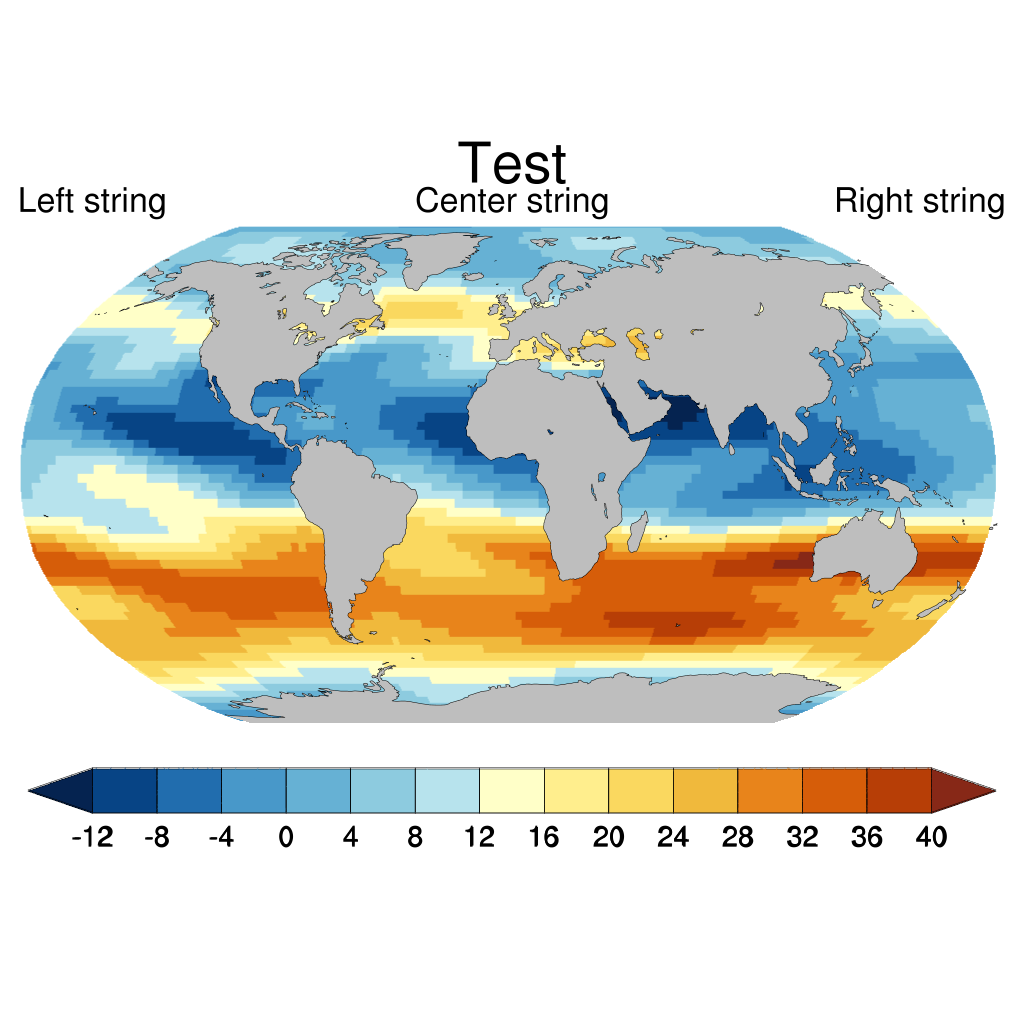

In [3]:
Image(outfilename+".000003.png")

In [ ]:
gsn_reverse_colormap(wks)

In [1]:
import cartopy

In [2]:
!ls -ltr

total 1737
-rw-r--r-- 1 jservon ciclad    219 18 déc.  09:08 climaf.log
-rw-r--r-- 1 jservon ciclad   2676 21 déc.  09:31 Browse_CMIP6_data.ipynb
-rw-r--r-- 1 jservon ciclad 712425  4 janv. 14:13 pyNGL_firsttest.ipynb
-rw-r--r-- 1 jservon ciclad 508818  4 janv. 14:15 newcolor1.000003.png
-rw-r--r-- 1 jservon ciclad 508818  4 janv. 14:15 newcolor1.000002.png
-rw-r--r-- 1 jservon ciclad 130566  4 janv. 14:15 newcolor1.000001.png


In [3]:
!rm -f newcolor1.000002.png newcolor1.000001.png